In [2]:
import os
import pandas as pd
import geopandas as gpd
import sklearn
import contextily as ctx
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)

DROOT = os.path.join('./1-data/')
drootf = lambda path: os.path.join(DROOT, path)

,LON,LAT,ALT,NAME,geometry
STN,,,,,
209,4.518,52.465,0.0,IJmond,POINT Z (4.51800 52.46500 0.00000)
210,4.430,52.171,-0.2,Valkenburg Zh,POINT Z (4.43000 52.17100 -0.20000)
215,4.437,52.141,-1.1,Voorschoten,POINT Z (4.43700 52.14100 -1.10000)


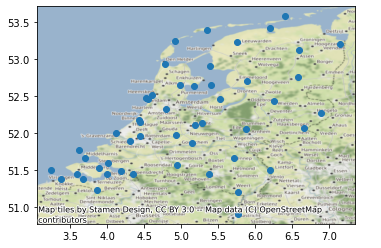

In [3]:
stations = pd.read_csv(drootf('./knmi-stations.csv'), index_col='STN')
stations['geometry'] = gpd.points_from_xy(stations.LON, stations.LAT, stations.ALT, crs='EPSG:4326')
stations = gpd.GeoDataFrame(stations)

ax = stations.plot()
ctx.add_basemap(ax=ax, crs=stations.crs)
stations.head(3)

### Uit knmi-result.txt
* FHVEC     : Vectorgemiddelde windsnelheid (in 0.1 m/s). Zie http://www.knmi.nl/kennis-en-datacentrum/achtergrond/klimatologische-brochures-en-boeken / Vector mean windspeed (in 0.1 m/s)
* FG        : Etmaalgemiddelde windsnelheid (in 0.1 m/s) / Daily mean windspeed (in 0.1 m/s)
* TG        : Etmaalgemiddelde temperatuur (in 0.1 graden Celsius) / Daily mean temperature in (0.1 degrees Celsius)
* DR        : Duur van de neerslag (in 0.1 uur) / Precipitation duration (in 0.1 hour)
* RH        : Etmaalsom van de neerslag (in 0.1 mm) (-1 voor <0.05 mm) / Daily precipitation amount (in 0.1 mm) (-1 for <0.05 mm)

,STN,FHVEC,FG,TG,DR,RH,DATE,NAME,geometry
1826,215,58.0,64.0,68.0,35.0,37.0,2018-01-01,Voorschoten,POINT Z (4.43700 52.14100 -1.10000)
1827,215,48.0,63.0,70.0,69.0,54.0,2018-01-02,Voorschoten,POINT Z (4.43700 52.14100 -1.10000)
1828,215,110.0,114.0,86.0,29.0,140.0,2018-01-03,Voorschoten,POINT Z (4.43700 52.14100 -1.10000)
1829,215,69.0,74.0,82.0,12.0,6.0,2018-01-04,Voorschoten,POINT Z (4.43700 52.14100 -1.10000)
1830,215,44.0,45.0,61.0,23.0,56.0,2018-01-05,Voorschoten,POINT Z (4.43700 52.14100 -1.10000)
...,...,...,...,...,...,...,...,...,...
85817,391,31.0,32.0,51.0,0.0,0.0,2022-12-27,Arcen,POINT Z (6.19700 51.49800 19.50000)
85818,391,47.0,48.0,91.0,58.0,30.0,2022-12-28,Arcen,POINT Z (6.19700 51.49800 19.50000)
85819,391,49.0,50.0,94.0,29.0,50.0,2022-12-29,Arcen,POINT Z (6.19700 51.49800 19.50000)
85820,391,37.0,41.0,86.0,38.0,21.0,2022-12-30,Arcen,POINT Z (6.19700 51.49800 19.50000)


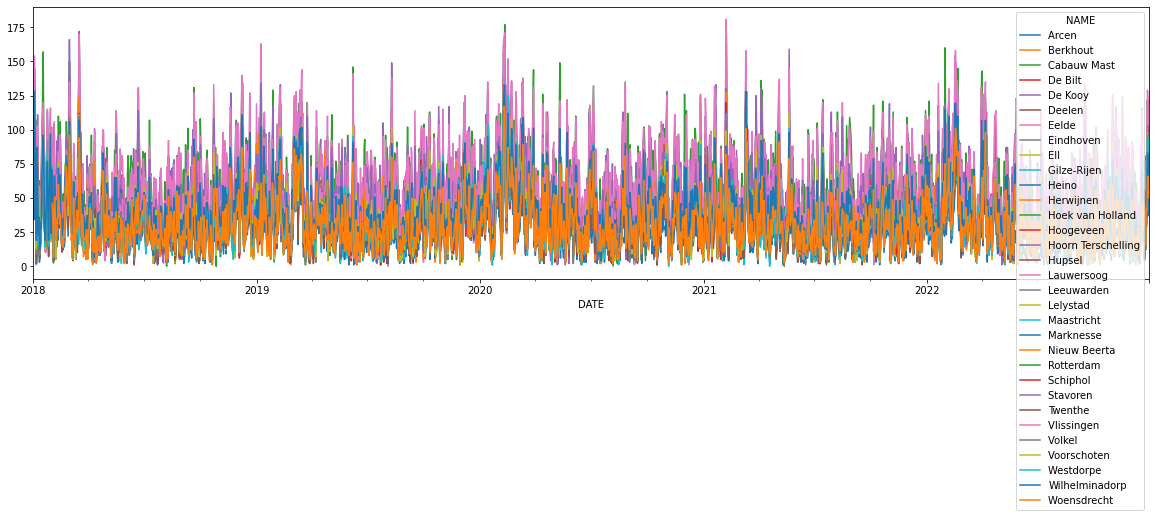

In [43]:
knmi_result_src = drootf('./knmi/result.txt')
knmi_result = pd.read_csv(knmi_result_src, skiprows=61, skipinitialspace = True)
knmi_result = knmi_result.rename(columns={'# STN': 'STN'})
knmi_result['DATE'] = pd.to_datetime(knmi_result.YYYYMMDD, format="%Y%m%d")
knmi_result = knmi_result.merge(stations[['NAME', 'geometry']], on='STN')
knmi_result = knmi_result.dropna(how='any').drop(columns=['YYYYMMDD'])
knmi_result.sort_values('DATE').pivot_table('FHVEC', 'DATE', 'NAME').plot(figsize=(20,5))
knmi_result

In [5]:
knmi_result[['STN', 'NAME']].drop_duplicates()

,STN,NAME
365,215,Voorschoten
1095,235,De Kooy
1460,240,Schiphol
2555,249,Berkhout
2920,251,Hoorn Terschelling
4015,260,De Bilt
4380,267,Stavoren
4745,269,Lelystad
5110,270,Leeuwarden
5475,273,Marknesse


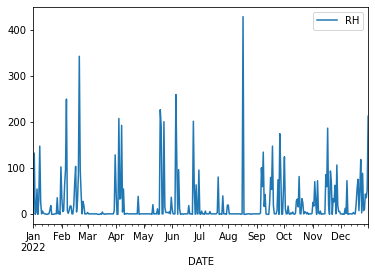

In [7]:
fig, ax = plt.subplots()
# knmi_result[knmi_result.STN == 260].plot(x='DATE', y='RH', ax=ax)
knmi_result[knmi_result.STN == 260].plot(x='DATE', y='RH', ax=ax)

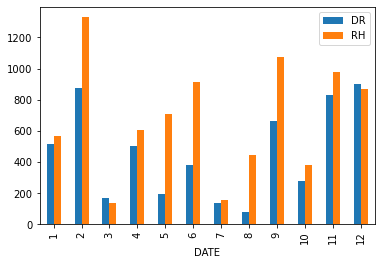

In [20]:
fig, ax = plt.subplots()
knmi_result[knmi_result.STN == 260].pivot_table(['DR', 'RH'], knmi_result.DATE.dt.month, aggfunc='sum').plot.bar(ax=ax)

In [25]:
import numpy as np
import sklearn as skl

In [26]:
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = skl.linear_model.LinearRegression().fit(X, y)
reg.score(X, y)
reg.coef_
reg.intercept_
reg.predict(np.array([[3, 5]]))

array([16.])

In [24]:
test = knmi_result.pivot_table(['DR', 'RH'], [knmi_result.DATE.dt.month, knmi_result.STN], aggfunc='sum').reset_index()
test

,DATE,STN,DR,RH
0,1,215,352.0,438.0
1,1,235,507.0,553.0
2,1,240,437.0,447.0
3,1,249,519.0,566.0
4,1,251,535.0,613.0
...,...,...,...,...
377,12,370,937.0,777.0
378,12,375,942.0,947.0
379,12,377,804.0,823.0
380,12,380,796.0,686.0


In [38]:
reg = skl.linear_model.LinearRegression().fit(test[['DATE', 'DR']], test.RH)
reg.score(test[['DATE', 'DR']], test.RH)

0.636882544944065

In [33]:
reg.coef_


array([4.03369832, 1.06669678])

In [34]:
reg.intercept_

103.50125247487034

In [35]:
reg.predict(np.array([[3, 5]]))

array([120.93583133])